## DECISION TREE

In [2]:
import pandas as aju
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = aju.read_csv("E:\\DATA SCIENCE\\MACHINE LEARNING\\ML_00_PROGRAM FILES\\DATASETS\\ML_08_DecisionTree_Salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [3]:
le = LabelEncoder()
df['company'] = le.fit_transform(df['company'])

In [4]:
df['job'] = le.fit_transform(df['job'])
df

,company,job,degree,salary_more_then_100k
0,2,2,bachelors,0
1,2,2,masters,0
2,2,0,bachelors,1
3,2,0,masters,1
4,2,1,bachelors,0
5,2,1,masters,1
6,0,2,masters,0
7,0,1,bachelors,0
8,0,0,bachelors,0
9,0,0,masters,1


In [5]:
df['degree'] = le.fit_transform(df['degree'])
df

,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,2,1,1,1
6,0,2,1,0
7,0,1,0,0
8,0,0,0,0
9,0,0,1,1


In [6]:
x = df.drop('salary_more_then_100k',axis = 'columns')
y = df['salary_more_then_100k']

In [7]:
x.columns

Index(['company', 'job', 'degree'], dtype='object')

In [10]:
model = DecisionTreeClassifier()
dcc = model.fit(x,y)

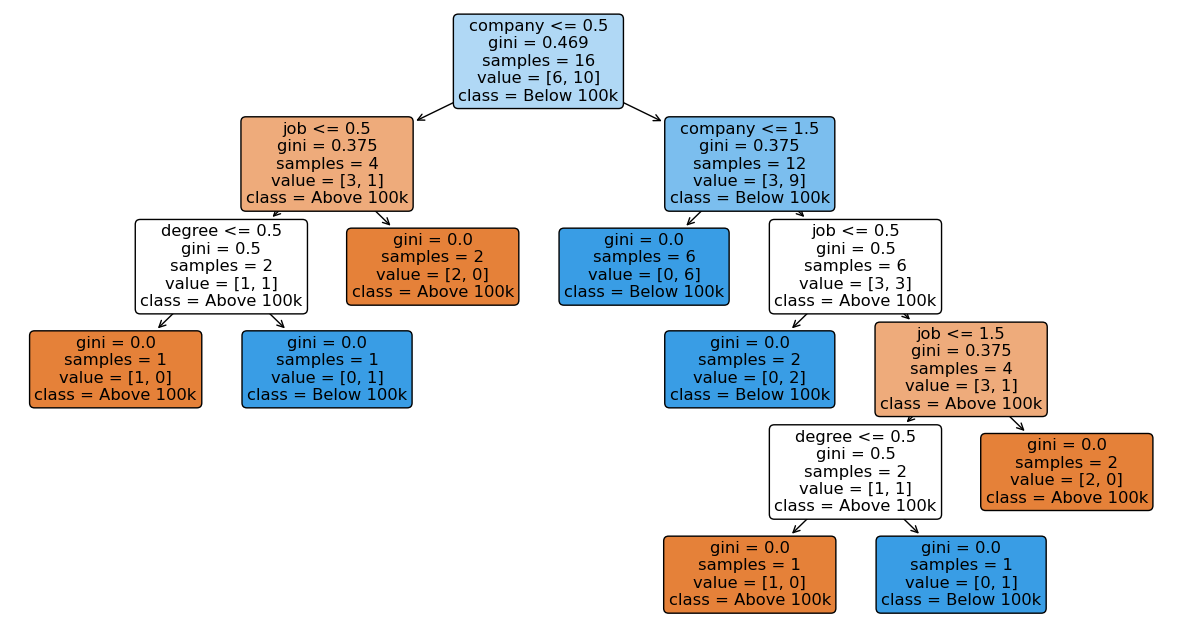

In [11]:
plt.figure(figsize = (15,8))
plot_tree(dcc,filled = True,class_names = ["Above 100k","Below 100k"],rounded = True,feature_names = x.columns )
plt.show()

In [12]:
model.score(x,y)

1.0

In [13]:
model.predict([[2,2,1]])

array([0], dtype=int64)

In [14]:
model.predict([[2,1,0]])

array([0], dtype=int64)

In [15]:
model.predict([[1,1,0]])

array([1], dtype=int64)

## DECISION TREE PRUNING

In [3]:
file = aju.read_csv('E:\\DATA SCIENCE\\MACHINE LEARNING\\ML_00_PROGRAM FILES\\DATASETS\\ML_08_DecisionTree_Titanic.csv')
file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
file['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
file.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
file_df = file[['Survived','Pclass','Age','Fare','Sex']]
file_df

,Survived,Pclass,Age,Fare,Sex
0,0,3,22.0,7.2500,male
1,1,1,38.0,71.2833,female
2,1,3,26.0,7.9250,female
3,1,1,35.0,53.1000,female
4,0,3,35.0,8.0500,male
...,...,...,...,...,...
886,0,2,27.0,13.0000,male
887,1,1,19.0,30.0000,female
888,0,3,NaN,23.4500,female
889,1,1,26.0,30.0000,male


In [8]:
file_df['Age'].isnull().sum()

177

In [9]:
mean_age = file_df['Age'].mean()

In [10]:
file_df['Age'] = file_df['Age'].fillna(mean_age)

In [11]:
file_df

,Survived,Pclass,Age,Fare,Sex
0,0,3,22.000000,7.2500,male
1,1,1,38.000000,71.2833,female
2,1,3,26.000000,7.9250,female
3,1,1,35.000000,53.1000,female
4,0,3,35.000000,8.0500,male
...,...,...,...,...,...
886,0,2,27.000000,13.0000,male
887,1,1,19.000000,30.0000,female
888,0,3,29.699118,23.4500,female
889,1,1,26.000000,30.0000,male


In [12]:
file_df['Age'].isnull().sum()

0

In [13]:
file_df.Sex = file_df.Sex.map({'male':1,'female':2})
file_df

,Survived,Pclass,Age,Fare,Sex
0,0,3,22.000000,7.2500,1
1,1,1,38.000000,71.2833,2
2,1,3,26.000000,7.9250,2
3,1,1,35.000000,53.1000,2
4,0,3,35.000000,8.0500,1
...,...,...,...,...,...
886,0,2,27.000000,13.0000,1
887,1,1,19.000000,30.0000,2
888,0,3,29.699118,23.4500,2
889,1,1,26.000000,30.0000,1


In [14]:
x1 = file_df.drop('Survived',axis = 'columns')
y1 = file_df.Survived

In [15]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size = 0.2,random_state = 33)

In [16]:
model1 = DecisionTreeClassifier(max_depth = 4)

In [17]:
dcc_titanic = model1.fit(x_train1,y_train1)

In [19]:
model1.score(x_test1,y_test1)

0.8156424581005587

In [22]:
y_pred1 = model1.predict(x_test1)

In [23]:
cm = confusion_matrix(y_test1,y_pred1)
cm

array([[103,   4],
       [ 29,  43]], dtype=int64)

<Axes: >

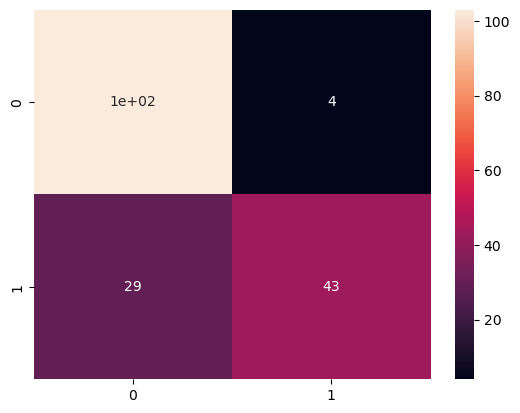

In [24]:
sn.heatmap(cm,annot = True)

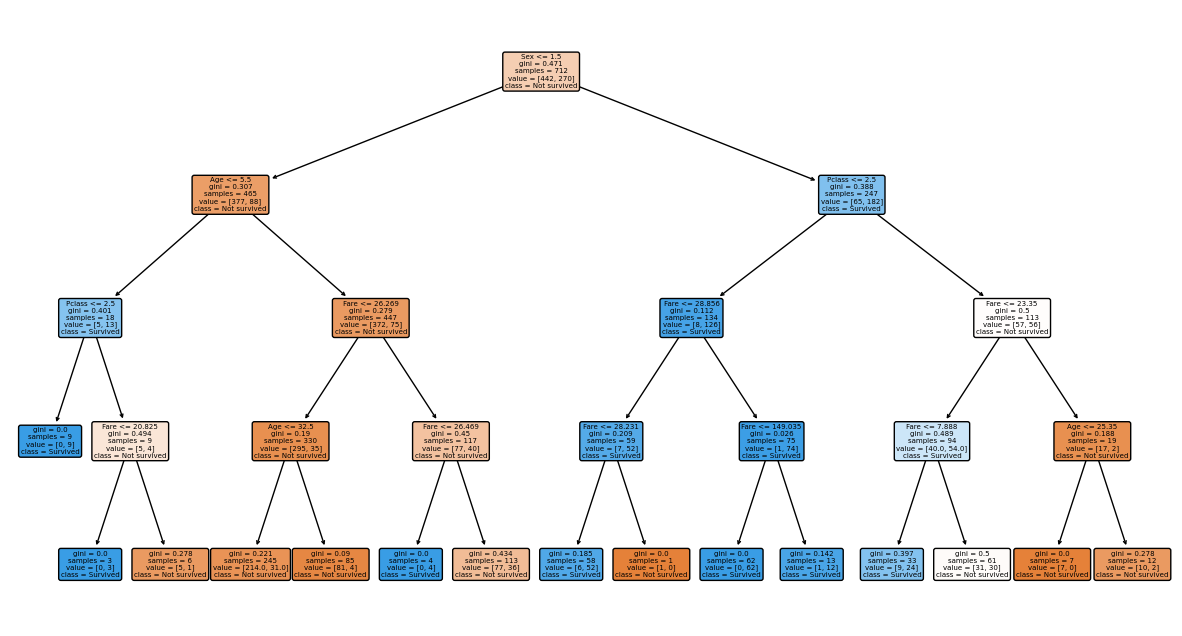

In [26]:
plt.figure(figsize = (15,8))
plot_tree(dcc_titanic,filled = True,class_names = ["Not survived","Survived"],rounded = True,feature_names = x1.columns )
plt.show()